In [1]:
# Install tf 2.0 preview GPU version
!pip install tensorflow-gpu==2.0.0-beta1 

     |████████████████████████████████| 348.9MB 112kB/s 
     |████████████████████████████████| 501kB 28.6MB/s 
     |████████████████████████████████| 3.1MB 27.7MB/s 


In [2]:
# Common Imports
import os                                   # For os commands (dir cwd etc)
import zipfile                              # for extracting data set files
                                 
import skimage                              # for scikit-learn image operations
from matplotlib import pyplot as plt        # for visualizing data
import numpy as np                          # for numerical python
import random                               # for random sampling in range(),number_of_values

import tensorflow as tf


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
print(tf.test.gpu_device_name())
print(tf.version)

/device:GPU:0
<module 'tensorflow._api.v2.version' from '/opt/conda/lib/python3.6/site-packages/tensorflow/_api/v2/version/__init__.py'>


**CHANGE WORKING DIRECTORY TO UPLOADED FILES**

---

In [4]:
print(os.getcwd())
print(os.listdir('../'))

/kaggle/working
['src', 'lib', 'input', 'working']


In [5]:
DATASET_PATH = "../input/belgiumts-dataset/"
os.chdir(DATASET_PATH)
print(os.getcwd())
print(os.listdir())

/kaggle/input/belgiumts-dataset
['BelgiumTSC_Testing', 'BelgiumTSC_Training']


Loading Data into Python

In [6]:
def load_images(data_directory):
  
  # lists to store Images and labels
  images = []
  labels = []
  log_index = 0
  # get list of all directories present in the data_directory path
  directories = [dir for dir in os.listdir(data_directory)
                 if os.path.isdir(os.path.join(data_directory,dir))] # to make sure that we include only directories and not any files present in the folder
  print(len(directories))
  for dir in directories:
    current_directory = os.path.join(data_directory,dir)
    # Gather all fileNames in the given directory to load images into images array using sklearn
    file_names = [os.path.join(current_directory,file) 
                  for file in os.listdir(current_directory)
                  if file.endswith('.ppm')
                 ]
    
    # Load all given Images into the Images array
    for file in file_names:
      images.append(skimage.data.imread(file))
      labels.append(int(dir))
      log_index+=1
      # print('Loading File: {0}'.format(log_index))
  print('Successfully Loadded  {0} images!'.format(len(images)))
  return np.array(images),np.array(labels)





In [7]:
# LOAD IMAGES 
  
ROOT_PATH = os.getcwd()  
TRAININ_DATA_PATH = ROOT_PATH + '/BelgiumTSC_Training/Training'  
TEST_DATA_PATH = ROOT_PATH + '/BelgiumTSC_Testing/Testing'
  
training_images, training_labels = load_images(TRAININ_DATA_PATH)
print('Training Data Sucessfully Loaded!!')
testing_images,testing_labels = load_images(TEST_DATA_PATH)
print('Test data sucessfully loaded!!')


62
Successfully Loadded  4575 images!
Training Data Sucessfully Loaded!!
62
Successfully Loadded  2520 images!
Test data sucessfully loaded!!


**To Verify and get some facts about our Data**

In [8]:
index = 1                          # Replace the index to check out the shape of input images
print('Dimension of Image at index ' + str(index) + ':', training_images[index].shape)  
print('Number of training Images :' , training_images.size)
print('Number of Dimensions of Images array : ',training_images.ndim)                 # ndims - number of dimensions for np array images

print('Dimensions for labels :', training_labels.shape)
print('Label for Image at index ' + str(index) +': ',training_labels[index])
print('Number of Classes : ',len(set(training_labels)))

print('Some additional tidbits about the memory requirements of data ')
print('Size of an individual image: ' ,training_images.itemsize)

Dimension of Image at index 1: (218, 238, 3)
Number of training Images : 4575
Number of Dimensions of Images array :  1
Dimensions for labels : (4575,)
Label for Image at index 1:  15
Number of Classes :  62
Some additional tidbits about the memory requirements of data 
Size of an individual image:  8


### Lets split these into 2 sets Validation and testing  with approx 1500 images for validation and 2000 for testing 


In [9]:
def transform_images(images,height,width):
  transformed_images = [skimage.transform.resize(image,(height,width)) for image in images]
  return  np.array(transformed_images)


### TEST FOR STRATIFIED SPLIT 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
print(training_images[0].shape)
print(training_images.size)
full_data = np.append(training_images,testing_images)
full_labels = np.append(training_labels,testing_labels)
print('Collated Image Data size :',full_data.shape)
print('Collated Image Labels size :',full_labels.shape)


(199, 206, 3)
4575
Collated Image Data size : (7095,)
Collated Image Labels size : (7095,)


In [12]:
## Remove Data for classes with unknown labels
##idx = [index for index in range(len(full_labels)) if full_labels[index] != 42  if full_labels[index] != 43  if full_labels[index] != 55 ]

In [13]:
##print('Filtered Data Lenght:',len(idx))
##print('Full Data Length :',len(full_data))

44 + 36 + 27 = 107 

7095(Total - 107 (class 42 ,43 and 55)

Now dataset doesn't have classes without labels

In [14]:
"""
full_data = full_data[idx]
full_labels = full_labels[idx]
#full_labels = [label-2 for label in full_labels if  55 > label > 43]
#full_labels = [label-1 for label in full_labels if   label > 55]
temp = []
for label in full_labels:
    if label < 55 and label > 43 :
        temp.append(label - 2)
    elif label > 55 :
        temp.append(label - 1)
    else :
        temp.append(label)

full_labels = np.array(temp)
print(full_data.size)
print(full_labels.size)
"""

'\nfull_data = full_data[idx]\nfull_labels = full_labels[idx]\n#full_labels = [label-2 for label in full_labels if  55 > label > 43]\n#full_labels = [label-1 for label in full_labels if   label > 55]\ntemp = []\nfor label in full_labels:\n    if label < 55 and label > 43 :\n        temp.append(label - 2)\n    elif label > 55 :\n        temp.append(label - 1)\n    else :\n        temp.append(label)\n\nfull_labels = np.array(temp)\nprint(full_data.size)\nprint(full_labels.size)\n'

In [15]:
train_images_split,test_images_split,train_labels_split,test_labels_split = train_test_split(full_data,full_labels,stratify = full_labels,test_size = 0.2)
print('Train Image Split dims: ',train_images_split.size)
print('Train Labels Split dims: ',train_labels_split.size)
print('Test Image Split dims: ',test_images_split.size)
print('Test Labels Split dims: ',test_labels_split.size)

Train Image Split dims:  5676
Train Labels Split dims:  5676
Test Image Split dims:  1419
Test Labels Split dims:  1419


#### Further split training data for Validation data

In [16]:
train_images_split,val_images_split,train_labels_split,val_labels_split = train_test_split(train_images_split,train_labels_split,stratify = train_labels_split,test_size = 0.2)
print('Train Image Split dims: ',train_images_split.size)
print('Train Labels Split dims: ',train_labels_split.size)
print('Test Image Split dims: ',val_images_split.size)
print('Test Labels Split dims: ',val_labels_split.size)

Train Image Split dims:  4540
Train Labels Split dims:  4540
Test Image Split dims:  1136
Test Labels Split dims:  1136


In [17]:
train_split_images = transform_images(train_images_split,128,128)
test_split_images = transform_images(test_images_split,128,128)
val_split_images = transform_images(val_images_split,128,128)

print('Finished Trasforming Images for Train,Test and Validation Sets')

Finished Trasforming Images for Train,Test and Validation Sets


Now we have our basic image sets ready. All we need to do is Transform them to appropriate sizes before trying out the model.

Training Set (128x128)--  train_split_images , train_labels_split  

Testing Set  --  test_split_images, test_labels_split

Validation Set --  val_split_images,val_labels_split

In [18]:
def show_images_of_all_classes(train_images,training_labels):
  num_cols =  8
  classes = len(set(training_labels))
  if classes % num_cols == 0:
      num_rows =  classes / num_cols
  else:
      num_rows = int(classes / num_cols) + 1
  plt.figure(figsize=(15,15))
  i = 1
  for class_number in set(training_labels):
    
    indices = np.where(training_labels == class_number)
    plt.subplot(num_rows,num_cols, i)
    i += 1
    plt.axis('off')
    plt.imshow(train_images[indices[0][1]])
    plt.title('Class :{0} [{1}] '.format(class_number,len(indices[0])))   #np.count_nonzero(labels == labels[index])))
  plt.show()


In [19]:
print(set(full_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}


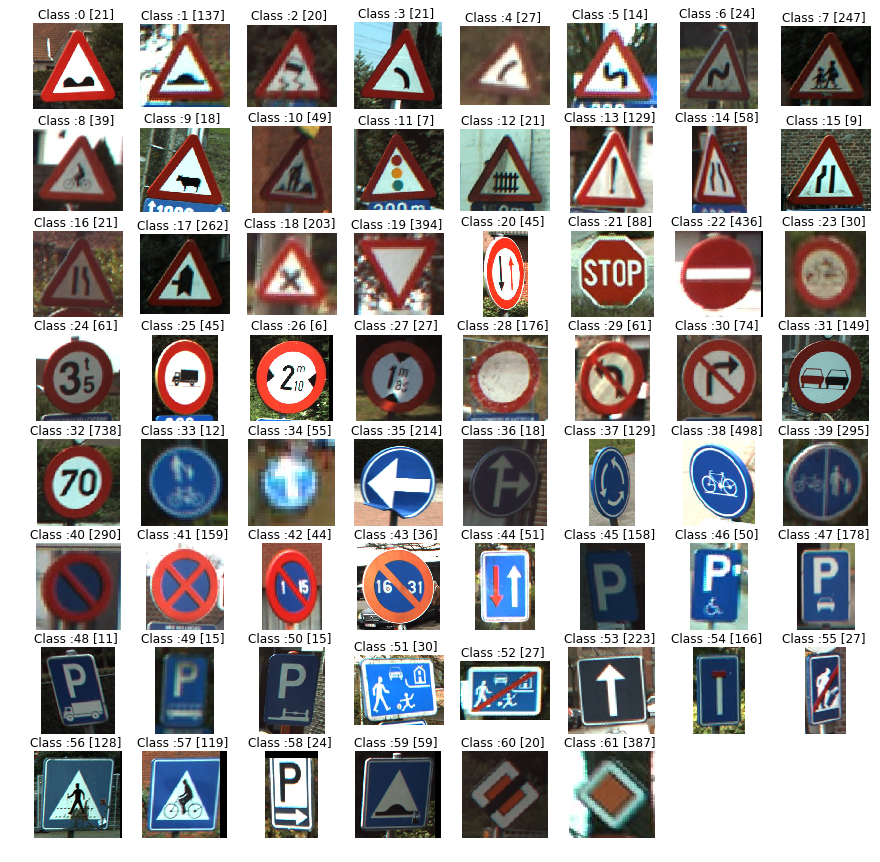

In [20]:
show_images_of_all_classes(full_data,full_labels)

### FINAL LABELS DICTIONARY

In [21]:
# Create a dictionary with Class Names
classnames = {
              0 : 'Warning for a bad road surface',
              1 : 'Warning for a speed bump',
              2 : 'Warning for a slippery road surface',
              3 : 'Warning for a curve to the left',
              4 : 'Warning for a curve to the right',
              5 : 'Warning for a double curve, first left then right',                                                    # Merge Classes 5 & 6 later
              6 : 'Warning for a double curve, first left then right',
              7 : 'Watch out for children ahead',
              8 : 'Watch out for  cyclists',
              9 : 'Watch out for cattle on the road',
              10: 'Watch out for roadwork ahead',
              11: 'Traffic light ahead',
              12: 'Watch out for railroad crossing with barriers ahead',
              13: 'Watch out ahead for unknown danger',
              14: 'Warning for a road narrowing',
              15: 'Warning for a road narrowing on the left',
              16: 'Warning for a road narrowing on the right',
              17: 'Warning for side road on the right',
              18: 'Warning for an uncontrolled crossroad',
              19: 'Give way to all drivers',
              20: 'Road narrowing, give way to oncoming drivers',
              21: 'Stop and give way to all drivers',
              22: 'Entry prohibited (road with one-way traffic)',
              23: 'Cyclists prohibited',
              24: 'Vehicles heavier than indicated prohibited',
              25: 'Trucks prohibited',
              26: 'Vehicles wider than indicated prohibited',
              27: 'Vehicles higher than indicated prohibited',
              28: 'Entry prohibited',
              29: 'Turning left prohibited',
              30: 'Turning right prohibited',
              31: 'Overtaking prohibited',
              32: 'Driving faster than indicated prohibited (speed limit)',
              33: 'Mandatory shared path for pedestrians and cyclists',
              34: 'Driving straight ahead mandatory',
              35: 'Mandatory left',
              36: 'Driving straight ahead or turning right mandatory',
              37: 'Mandatory direction of the roundabout',
              38: 'Mandatory path for cyclists',
              39: 'Mandatory divided path for pedestrians and cyclists',
              40: 'Parking prohibited',
              41: 'Parking and stopping prohibited',
              42: '',
              43: '',
              44: 'Road narrowing, oncoming drivers have to give way',
              45: 'Parking is allowed',
              46: 'parking for handicapped',
              47: 'Parking for motor cars',
              48: 'Parking for goods vehicles',
              49: 'Parking for buses',
              50: 'Parking only allowed on the sidewalk',
              51: 'Begin of a residential area',
              52: 'End of the residential area',
              53: 'Road with one-way traffic',
              54: 'Dead end street',
              55: '', 
              56: 'Crossing for pedestrians',
              57: 'Crossing for cyclists',
              58: 'Parking exit',
              59: 'Information Sign : Speed bump',
              60: 'End of the priority road',
              61: 'Begin of a priority road'
    }

### Image Augmentation

Keras provides a handy api to do various operations on our input images before passing them to the model.
These changes range from cropping the image to flipping it and even providing shearing effects......

So Let's look at how it looks in action:

In [22]:
# Training Data Generator

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.25,fill_mode='nearest')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [23]:
# Ready our generators for passing into models 
train_generator = training_datagen.flow(train_split_images,train_labels_split,batch_size=32)

validation_generator = validation_datagen.flow(val_split_images,val_labels_split,batch_size=32)


In [24]:
# A little test
# try and visualize your images

nyan_generator = training_datagen.flow(train_split_images[1:2], train_labels_split[1:2],batch_size=1)

sign = [next(nyan_generator) for i in range(0,10)]
fig, ax = plt.subplots(1,10, figsize=(16, 6))
print('Labels:', [item[1][0] for item in sign])
l = [ax[i].imshow(sign[i][0][0]) for i in range(0,10)]

Labels: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32]


# Define Convolutional Network

In [25]:
def conv_net(train_images_dims,num_of_classes,filter_size = 2,num_convolutions=64,num_strides=2):
  # pre process image dimensions
  if (len(train_images_dims) == 3):    # Channel Last
    train_images_dims = (train_images_dims[1],train_images_dims[2])   
  elif (len(train_images_dims) == 4):
    train_images_dims = (train_images_dims[1],train_images_dims[2],train_images_dims[3])
  
  model  = tf.keras.Sequential()
  
  #Conv1
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu',input_shape= train_images_dims))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
    
  #Conv2
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv3
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
    
  #Conv4
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv5
  model.add(tf.keras.layers.Conv2D(int(num_convolutions) ,(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
  
  #Flatten and add Dense Layer
  model.add(tf.keras.layers.Flatten())
  #Dense 1
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  #Dense 2
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  
  #Output Layer
  model.add(tf.keras.layers.Dense(num_of_classes,activation = 'softmax'))
  return model

## Define Callback

In [26]:
monitor = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 8,restore_best_weights = True, min_delta = 0.01)

In [27]:
model_regularized = conv_net(train_split_images.shape,len(set(train_labels_split)),filter_size=2,num_convolutions=512)

In [28]:
model_regularized.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model_regularized.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 512)     6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 512)       1049088   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 512)       1049088   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 512)       1

 about 32 

In [29]:
history = model_regularized.fit_generator(train_generator, validation_data=validation_generator,steps_per_epoch=(len(train_split_images) / 32),epochs = 52,verbose=1,callbacks=[monitor])  # 32 = batch size

Epoch 1/52
142/141 [==============================] - 44s 313ms/step - loss: 3.6398 - accuracy: 0.0932 - val_loss: 3.4913 - val_accuracy: 0.1479
Epoch 2/52
142/141 [==============================] - 38s 266ms/step - loss: 3.1343 - accuracy: 0.1892 - val_loss: 2.6851 - val_accuracy: 0.2782
Epoch 3/52
142/141 [==============================] - 38s 266ms/step - loss: 2.6005 - accuracy: 0.3070 - val_loss: 2.0023 - val_accuracy: 0.3944
Epoch 4/52
142/141 [==============================] - 38s 268ms/step - loss: 2.1669 - accuracy: 0.3839 - val_loss: 1.6873 - val_accuracy: 0.5044
Epoch 5/52
142/141 [==============================] - 38s 265ms/step - loss: 1.8936 - accuracy: 0.4491 - val_loss: 1.5082 - val_accuracy: 0.5502
Epoch 6/52
142/141 [==============================] - 38s 265ms/step - loss: 1.6876 - accuracy: 0.4985 - val_loss: 1.2692 - val_accuracy: 0.6259
Epoch 7/52
142/141 [==============================] - 38s 265ms/step - loss: 1.5116 - accuracy: 0.5465 - val_loss: 1.1358 - val_ac

### Visualize the losses

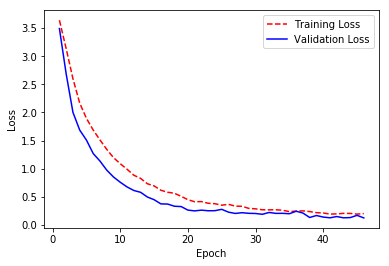

In [30]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [31]:
#history = model_regularized.fit_generator(train_generator, validation_data=validation_generator,steps_per_epoch=(len(training_images128) / 32),epochs = 30,verbose=1)  # 32 = batch size

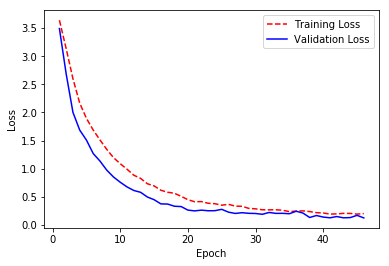

In [32]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [33]:
indexes = []
for label in set(test_labels_split):
        indexes.append(np.where(test_labels_split == label)[0])
   
#indexes = [ind[0][0] for ind in indexes]
print(len(indexes))
id  = []
for i in indexes:
    id.append(i.flat[0])

class_wise_test_img = test_split_images[id]
class_wise_test_labels = test_labels_split[id]
print(class_wise_test_img.shape)

62
(62, 128, 128, 3)


In [34]:
model_regularized.evaluate(test_split_images,test_labels_split)

1419/1419 [==============================] - 3s 2ms/sample - loss: 0.1445 - accuracy: 0.9648


[0.14446924353074847, 0.96476394]

In [35]:
model_regularized.evaluate(class_wise_test_img,class_wise_test_labels)

62/62 [==============================] - 0s 7ms/sample - loss: 0.3278 - accuracy: 0.8871


[0.32784929006330427, 0.88709676]

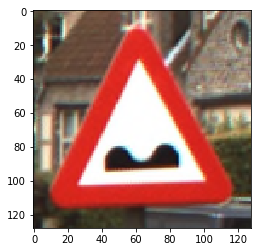

PREDICTION : The Image belongs to class : 0, with description : Warning for a bad road surface
ACTUAL : The Image belongs to class : 0, with description : Warning for a bad road surface


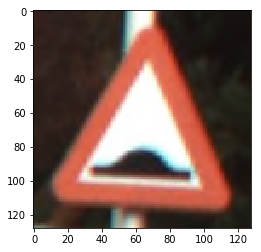

PREDICTION : The Image belongs to class : 1, with description : Warning for a speed bump
ACTUAL : The Image belongs to class : 1, with description : Warning for a speed bump


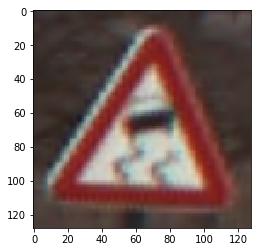

PREDICTION : The Image belongs to class : 2, with description : Warning for a slippery road surface
ACTUAL : The Image belongs to class : 2, with description : Warning for a slippery road surface


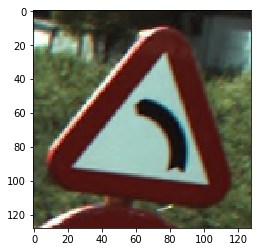

PREDICTION : The Image belongs to class : 3, with description : Warning for a curve to the left
ACTUAL : The Image belongs to class : 3, with description : Warning for a curve to the left


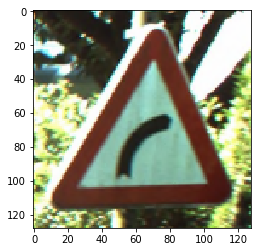

PREDICTION : The Image belongs to class : 4, with description : Warning for a curve to the right
ACTUAL : The Image belongs to class : 4, with description : Warning for a curve to the right


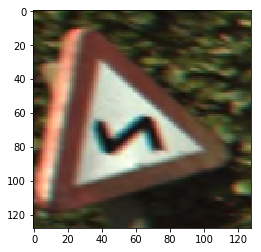

PREDICTION : The Image belongs to class : 5, with description : Warning for a double curve, first left then right
ACTUAL : The Image belongs to class : 5, with description : Warning for a double curve, first left then right


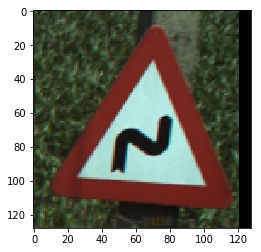

PREDICTION : The Image belongs to class : 6, with description : Warning for a double curve, first left then right
ACTUAL : The Image belongs to class : 6, with description : Warning for a double curve, first left then right


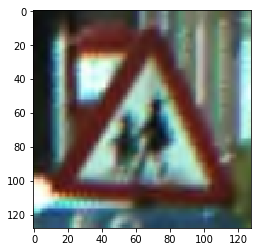

PREDICTION : The Image belongs to class : 7, with description : Watch out for children ahead
ACTUAL : The Image belongs to class : 7, with description : Watch out for children ahead


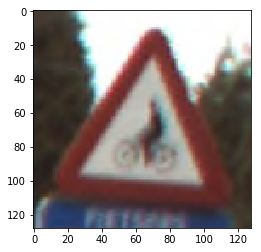

PREDICTION : The Image belongs to class : 8, with description : Watch out for  cyclists
ACTUAL : The Image belongs to class : 8, with description : Watch out for  cyclists


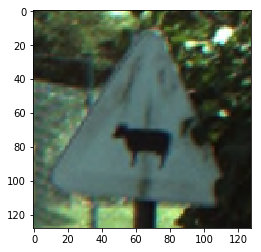

PREDICTION : The Image belongs to class : 61, with description : Begin of a priority road
ACTUAL : The Image belongs to class : 9, with description : Watch out for cattle on the road


PREDICTION : The Image belongs to class : 10, with description : Watch out for roadwork ahead
ACTUAL : The Image belongs to class : 10, with description : Watch out for roadwork ahead


PREDICTION : The Image belongs to class : 11, with description : Traffic light ahead
ACTUAL : The Image belongs to class : 11, with description : Traffic light ahead


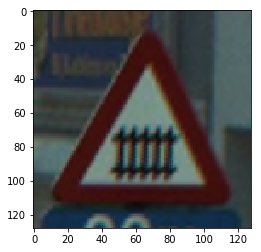

PREDICTION : The Image belongs to class : 12, with description : Watch out for railroad crossing with barriers ahead
ACTUAL : The Image belongs to class : 12, with description : Watch out for railroad crossing with barriers ahead


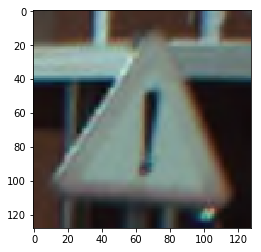

PREDICTION : The Image belongs to class : 13, with description : Watch out ahead for unknown danger
ACTUAL : The Image belongs to class : 13, with description : Watch out ahead for unknown danger


PREDICTION : The Image belongs to class : 15, with description : Warning for a road narrowing on the left
ACTUAL : The Image belongs to class : 14, with description : Warning for a road narrowing


PREDICTION : The Image belongs to class : 15, with description : Warning for a road narrowing on the left
ACTUAL : The Image belongs to class : 15, with description : Warning for a road narrowing on the left


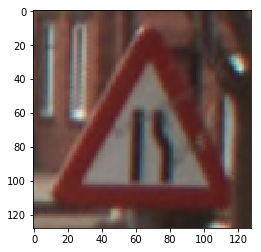

PREDICTION : The Image belongs to class : 16, with description : Warning for a road narrowing on the right
ACTUAL : The Image belongs to class : 16, with description : Warning for a road narrowing on the right


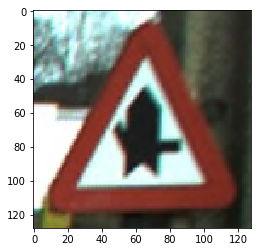

PREDICTION : The Image belongs to class : 17, with description : Warning for side road on the right
ACTUAL : The Image belongs to class : 17, with description : Warning for side road on the right


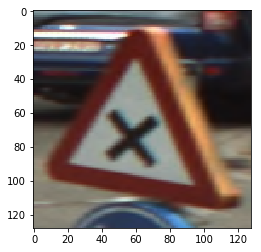

PREDICTION : The Image belongs to class : 18, with description : Warning for an uncontrolled crossroad
ACTUAL : The Image belongs to class : 18, with description : Warning for an uncontrolled crossroad


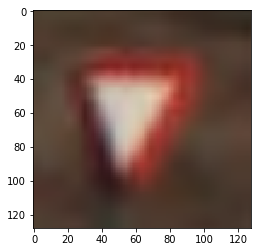

PREDICTION : The Image belongs to class : 19, with description : Give way to all drivers
ACTUAL : The Image belongs to class : 19, with description : Give way to all drivers


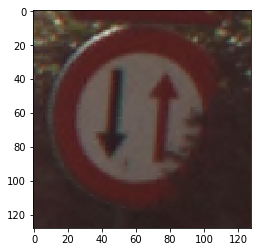

PREDICTION : The Image belongs to class : 20, with description : Road narrowing, give way to oncoming drivers
ACTUAL : The Image belongs to class : 20, with description : Road narrowing, give way to oncoming drivers


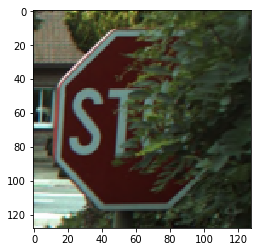

PREDICTION : The Image belongs to class : 21, with description : Stop and give way to all drivers
ACTUAL : The Image belongs to class : 21, with description : Stop and give way to all drivers


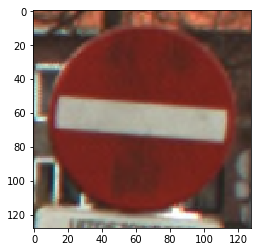

PREDICTION : The Image belongs to class : 22, with description : Entry prohibited (road with one-way traffic)
ACTUAL : The Image belongs to class : 22, with description : Entry prohibited (road with one-way traffic)


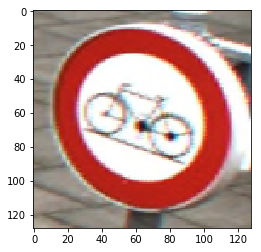

PREDICTION : The Image belongs to class : 23, with description : Cyclists prohibited
ACTUAL : The Image belongs to class : 23, with description : Cyclists prohibited


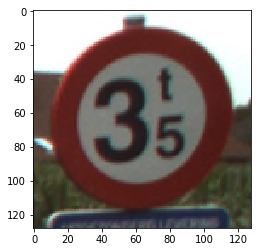

PREDICTION : The Image belongs to class : 24, with description : Vehicles heavier than indicated prohibited
ACTUAL : The Image belongs to class : 24, with description : Vehicles heavier than indicated prohibited


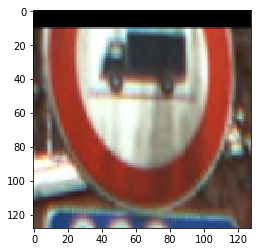

PREDICTION : The Image belongs to class : 25, with description : Trucks prohibited
ACTUAL : The Image belongs to class : 25, with description : Trucks prohibited


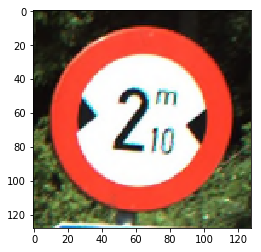

PREDICTION : The Image belongs to class : 24, with description : Vehicles heavier than indicated prohibited
ACTUAL : The Image belongs to class : 26, with description : Vehicles wider than indicated prohibited


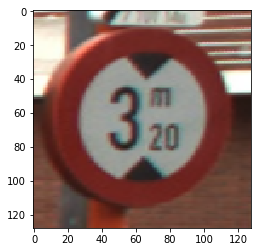

PREDICTION : The Image belongs to class : 27, with description : Vehicles higher than indicated prohibited
ACTUAL : The Image belongs to class : 27, with description : Vehicles higher than indicated prohibited


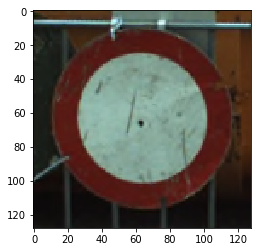

PREDICTION : The Image belongs to class : 28, with description : Entry prohibited
ACTUAL : The Image belongs to class : 28, with description : Entry prohibited


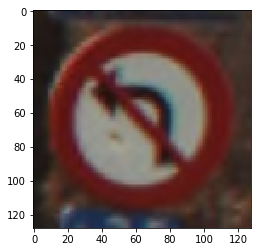

PREDICTION : The Image belongs to class : 29, with description : Turning left prohibited
ACTUAL : The Image belongs to class : 29, with description : Turning left prohibited


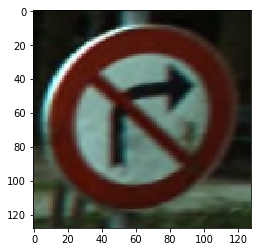

PREDICTION : The Image belongs to class : 30, with description : Turning right prohibited
ACTUAL : The Image belongs to class : 30, with description : Turning right prohibited


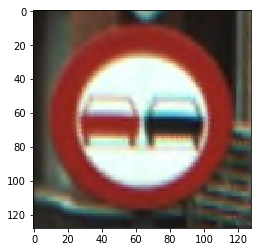

PREDICTION : The Image belongs to class : 31, with description : Overtaking prohibited
ACTUAL : The Image belongs to class : 31, with description : Overtaking prohibited


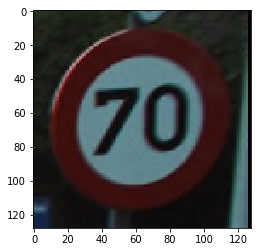

PREDICTION : The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)
ACTUAL : The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)


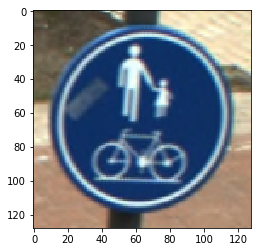

PREDICTION : The Image belongs to class : 33, with description : Mandatory shared path for pedestrians and cyclists
ACTUAL : The Image belongs to class : 33, with description : Mandatory shared path for pedestrians and cyclists


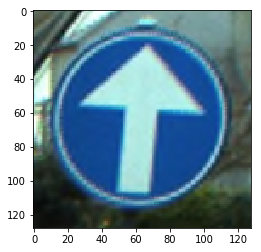

PREDICTION : The Image belongs to class : 34, with description : Driving straight ahead mandatory
ACTUAL : The Image belongs to class : 34, with description : Driving straight ahead mandatory


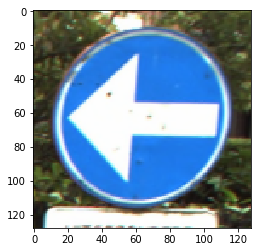

PREDICTION : The Image belongs to class : 35, with description : Mandatory left
ACTUAL : The Image belongs to class : 35, with description : Mandatory left


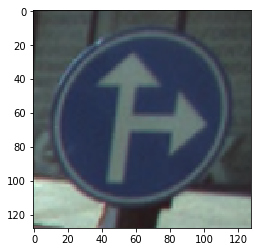

PREDICTION : The Image belongs to class : 36, with description : Driving straight ahead or turning right mandatory
ACTUAL : The Image belongs to class : 36, with description : Driving straight ahead or turning right mandatory


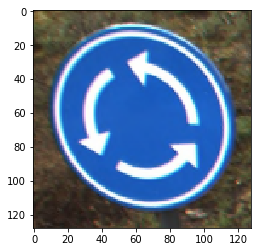

PREDICTION : The Image belongs to class : 37, with description : Mandatory direction of the roundabout
ACTUAL : The Image belongs to class : 37, with description : Mandatory direction of the roundabout


PREDICTION : The Image belongs to class : 38, with description : Mandatory path for cyclists
ACTUAL : The Image belongs to class : 38, with description : Mandatory path for cyclists


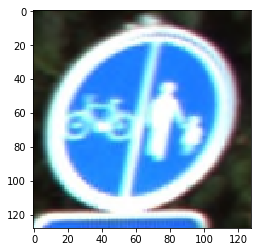

PREDICTION : The Image belongs to class : 39, with description : Mandatory divided path for pedestrians and cyclists
ACTUAL : The Image belongs to class : 39, with description : Mandatory divided path for pedestrians and cyclists


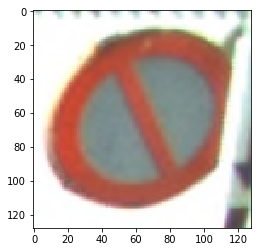

PREDICTION : The Image belongs to class : 29, with description : Turning left prohibited
ACTUAL : The Image belongs to class : 40, with description : Parking prohibited


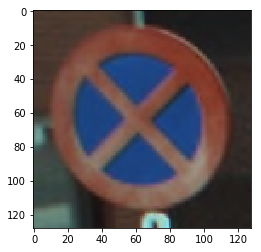

PREDICTION : The Image belongs to class : 41, with description : Parking and stopping prohibited
ACTUAL : The Image belongs to class : 41, with description : Parking and stopping prohibited


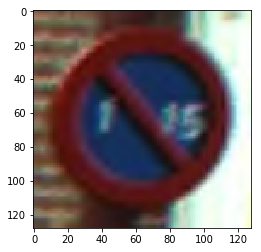

PREDICTION : The Image belongs to class : 42, with description : 
ACTUAL : The Image belongs to class : 42, with description : 


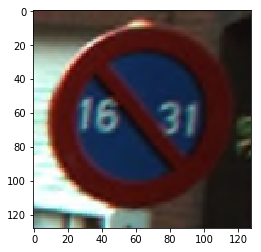

PREDICTION : The Image belongs to class : 42, with description : 
ACTUAL : The Image belongs to class : 43, with description : 


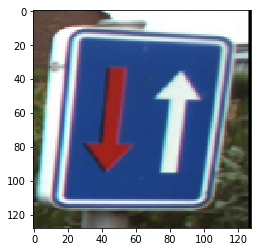

PREDICTION : The Image belongs to class : 44, with description : Road narrowing, oncoming drivers have to give way
ACTUAL : The Image belongs to class : 44, with description : Road narrowing, oncoming drivers have to give way


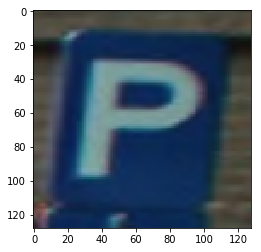

PREDICTION : The Image belongs to class : 45, with description : Parking is allowed
ACTUAL : The Image belongs to class : 45, with description : Parking is allowed


PREDICTION : The Image belongs to class : 45, with description : Parking is allowed
ACTUAL : The Image belongs to class : 46, with description : parking for handicapped


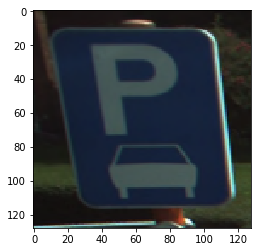

PREDICTION : The Image belongs to class : 47, with description : Parking for motor cars
ACTUAL : The Image belongs to class : 47, with description : Parking for motor cars


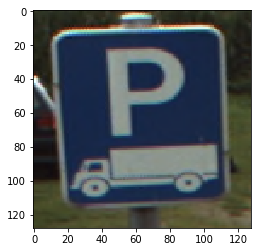

PREDICTION : The Image belongs to class : 47, with description : Parking for motor cars
ACTUAL : The Image belongs to class : 48, with description : Parking for goods vehicles


PREDICTION : The Image belongs to class : 49, with description : Parking for buses
ACTUAL : The Image belongs to class : 49, with description : Parking for buses


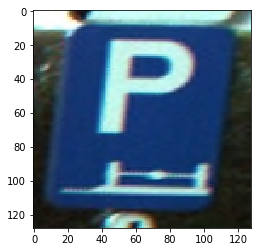

PREDICTION : The Image belongs to class : 50, with description : Parking only allowed on the sidewalk
ACTUAL : The Image belongs to class : 50, with description : Parking only allowed on the sidewalk


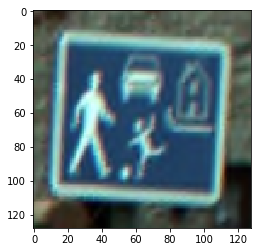

PREDICTION : The Image belongs to class : 51, with description : Begin of a residential area
ACTUAL : The Image belongs to class : 51, with description : Begin of a residential area


PREDICTION : The Image belongs to class : 52, with description : End of the residential area
ACTUAL : The Image belongs to class : 52, with description : End of the residential area


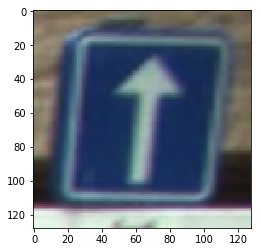

PREDICTION : The Image belongs to class : 53, with description : Road with one-way traffic
ACTUAL : The Image belongs to class : 53, with description : Road with one-way traffic


PREDICTION : The Image belongs to class : 54, with description : Dead end street
ACTUAL : The Image belongs to class : 54, with description : Dead end street


PREDICTION : The Image belongs to class : 55, with description : 
ACTUAL : The Image belongs to class : 55, with description : 


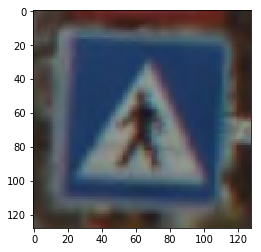

PREDICTION : The Image belongs to class : 56, with description : Crossing for pedestrians
ACTUAL : The Image belongs to class : 56, with description : Crossing for pedestrians


PREDICTION : The Image belongs to class : 57, with description : Crossing for cyclists
ACTUAL : The Image belongs to class : 57, with description : Crossing for cyclists


PREDICTION : The Image belongs to class : 58, with description : Parking exit
ACTUAL : The Image belongs to class : 58, with description : Parking exit


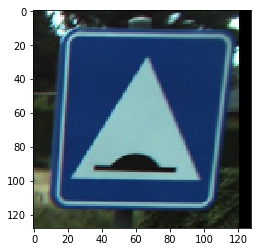

PREDICTION : The Image belongs to class : 59, with description : Information Sign : Speed bump
ACTUAL : The Image belongs to class : 59, with description : Information Sign : Speed bump


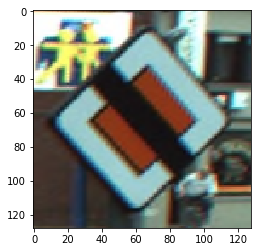

PREDICTION : The Image belongs to class : 60, with description : End of the priority road
ACTUAL : The Image belongs to class : 60, with description : End of the priority road


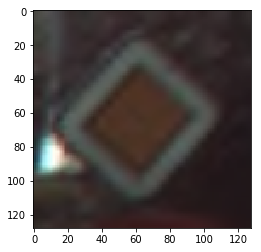

PREDICTION : The Image belongs to class : 61, with description : Begin of a priority road
ACTUAL : The Image belongs to class : 61, with description : Begin of a priority road


In [36]:
for i,img in enumerate(class_wise_test_img):
     show_img = img
     img_arr = np.expand_dims(img,axis=0) # to add new dimension to meet required input dims

     classes = model_regularized.predict(img_arr)

     plt.imshow(img)
     #plt.axis('off')
     plt.show()
     predicted_class = np.argmax(classes)
     print('PREDICTION : The Image belongs to class : {}, with description : {}'.format(predicted_class,classnames[predicted_class]))
     print('ACTUAL : The Image belongs to class : {}, with description : {}'.format(class_wise_test_labels[i],classnames[class_wise_test_labels[i]]))

# Testing Custom Images

In [37]:
def predict_image(model,directory):
    for file_name in os.listdir(directory):
        if '.jpg' in file_name or '.png' in file_name:
            img = tf.keras.preprocessing.image.load_img(os.path.join(directory,file_name),target_size = (128,128))  # Defaults to rgb mode and returns a PIL Instance
            
            img_arr = tf.keras.preprocessing.image.img_to_array(img) # returns 3d numpy array
            show_img = img_arr
            img_arr = np.expand_dims(img_arr,axis=0) # to add new dimension to meet required input dims
            
            classes = model.predict(img_arr)
            
            plt.imshow(img)
            #plt.axis('off')
            plt.show()
            predicted_class = np.argmax(classes)
            print('The Image belongs to class : {}, with description : {}'.format(predicted_class,classnames[predicted_class]))
    

In [38]:
#print(os.listdir('../'))

The Image belongs to class : 29, with description : Turning left prohibited


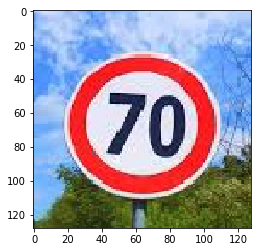

The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


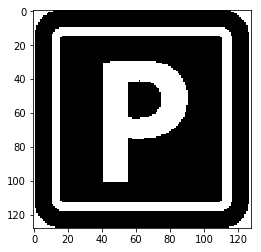

The Image belongs to class : 17, with description : Warning for side road on the right


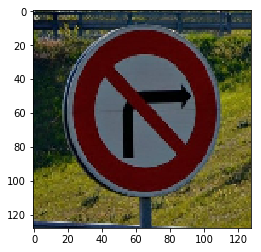

The Image belongs to class : 30, with description : Turning right prohibited


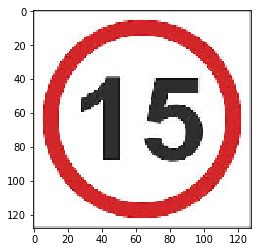

The Image belongs to class : 30, with description : Turning right prohibited


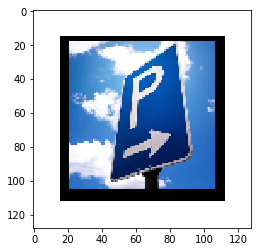

The Image belongs to class : 51, with description : Begin of a residential area


The Image belongs to class : 21, with description : Stop and give way to all drivers


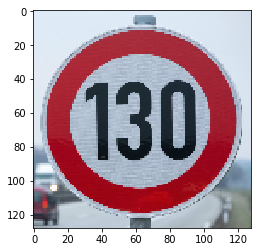

The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)


In [39]:
predict_image(model_regularized,'../belgium-new-test-images')

### Change directory to working to save the model

In [40]:
os.chdir(r'../../working')

In [41]:
print(os.listdir())

['__output__.json', '__notebook__.ipynb']


In [42]:
# SAVE THE MODEL AS H5 File
model_regularized.save('final_model.h5')

In [43]:
# Try out tensorflow saved model to save the model
tf.saved_model.save(model_regularized,'model_regularized_tf2')

# Trying  out tensorflow js for the model to serve using javascript

In [44]:
!pip install tensorflowjs

     |████████████████████████████████| 2.8MB 8.0MB/s 
     |████████████████████████████████| 17.3MB 24.7MB/s 
ERROR: allennlp 0.8.4 requires awscli>=1.11.91, which is not installed.
ERROR: allennlp 0.8.4 requires flaky, which is not installed.
ERROR: allennlp 0.8.4 requires responses>=0.7, which is not installed.
ERROR: tsfresh 0.12.0 has requirement pandas<=0.23.4,>=0.20.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: ray 0.7.3 has requirement protobuf>=3.8.0, but you'll have protobuf 3.7.1 which is incompatible.
ERROR: ortools 7.3.7083 has requirement protobuf>=3.9.0, but you'll have protobuf 3.7.1 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.5.0 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.16.4 which is incompat

In [45]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model_regularized, "model_js")

In [46]:
from IPython.display import FileLink
FileLink(r'final_model.h5')

/kaggle/working/final_model.h5

In [47]:
print(os.listdir('../../working'))

FileNotFoundError: [Errno 2] No such file or directory: '../../working'

In [48]:
#tf.saved_model.save(model_regularized,'../../../tmp/')

In [49]:
#model_regularized.save('../../../tmp/final_model.h5')

In [50]:
#print(os.listdir('../../working'))